# Challenge -  KNN Regression & OLS Regression model on Donating Blood #

## By Lorenz Madarang ##

## Data: https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data ##

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### Ingestion and Cleaning ###
There are no nulls in the dataset.  To make sure that column names are able to be used in creating the models, I modified the names of the columns.

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'

In [4]:
df = pd.read_csv(url, sep=',')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 747
Data columns (total 5 columns):
recent_month         748 non-null int64
frequency            748 non-null int64
blood_amount         748 non-null int64
time                 748 non-null int64
donated_march2007    748 non-null int64
dtypes: int64(5)
memory usage: 55.1+ KB


In [5]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [7]:
df = df.rename(index=str, columns = {'Recency (months)': 'recent_month',
                                'Frequency (times)' : 'frequency',
                                'Monetary (c.c. blood)' : 'blood_amount',
                                 'Time (months)' : 'time',
                                 'whether he/she donated blood in March 2007' : 'donated_march2007'})

In [8]:
df.head()

,recent_month,frequency,blood_amount,time,donated_march2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### KNN Regression ###
I created a KNN Regression model using the time (in months) since first donation.  In the first model I didn't add a distance weight.  The value I used for k is 10.

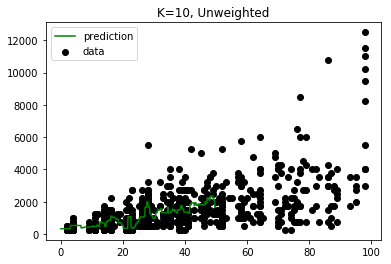

In [38]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.time)
Y = df.blood_amount
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

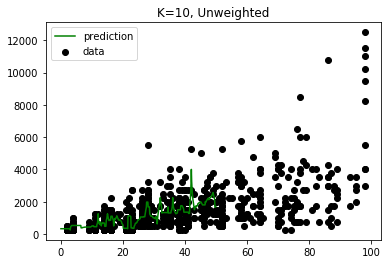

In [39]:
from sklearn import neighbors

# Build our model.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(df.time)
Y = df.blood_amount
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.32 (+/- 0.44)
Weighted Accuracy: 0.19 (+/- 0.82)


### OLS Regression ###
For the linear regression model I used the same variable, time (in months) since first donation.

In [14]:
from sklearn import linear_model
import statsmodels.formula.api as smf

In [26]:
regr = linear_model.LinearRegression()
Y = df['blood_amount'].values.reshape(-1, 1)
X = df[['time']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 38.02410763]]

Intercept: 
 [ 75.13075943]

R-squared:
0.403149146878


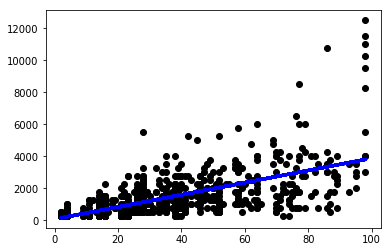

In [46]:
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

In [44]:
score_ols = cross_val_score(regr, X, Y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

OLS Accuracy: 0.26 (+/- 0.53)


### Overall Evaluation ###
In the KNN Regression model it looks like the model without the distance weight performed better.  The accuracy of the KNN Regression model without the distance weight was 0.32 and the accuracy of the model with the distance weight is only 0.19.  For the OLS Regression model, the accuracy is .26.  Looking at the cross validation scores, I would go with the KNN Regression model with no distance weight.  

In the KNN Regression model is looks at the 10 nearest neighbors, averages the 10 nearest neighbors and uses the average as the prediction.  In the OLS Regression model, a prediction  function is created to predict the values.  The prediction function finds the function that has the least squared errors between the predicted value and the actual value.  

Looking at the data, it seems that the KNN Regression model without the distance weight is able to perform the best because the variance of the data starts to increase as the time since first donation starts to increase.  The KNN model without distance weights is able to perform better than the KNN model with distance weights and the OLS model in the section where variance increases.  A simple average of the 10 nearest neighbors is a better prediction than the other predictions produced from the other models.